# **New York_Airbnb Price Prediction**
Author: Chiahui Chen


## Introduction 
### - Background
Airbnb is a platform to find adventures nearby or in faraway places and access unique homes, experiences, and places around the world. It provides us to share our properties in many types and become the Airbnb host, in other way, we can also through this platform to find the distinctive place and experience the local style as travelers.

In this Notebook, we explore the 2020 housing data of Airbnb in New York City.

### - Problem


## Data Source
There are two sections in my project:

I'll only use the data on Airbnb Open Data source to do the research and the prediction, then implementing the Foursquare data to see whether it will improve the prediction.

1. Link: http://insideairbnb.com/get-the-data.html
2. New York Data :https://cocl.us/new_york_dataset
3. Foursquare


# First Section - Airbnb Open Data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import re
import requests
from sklearn.metrics import mean_squared_error
from math import sqrt
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#import folium # map rendering library
#import requests # library to handle requests

In [18]:
df = {}
df['raw'] = pd.read_csv("/content/airbnb_ny.csv")
df['raw'].head()

Unnamed: 0    id  ...          cancellation_policy reviews_per_month
0           0  2060  ...                     flexible              0.01
1           1  2595  ...  strict_14_with_grace_period              0.38
2           2  3831  ...                     moderate              4.66
3           3  5099  ...                     moderate              0.58
4           4  5121  ...  strict_14_with_grace_period              0.38

[5 rows x 34 columns]

# 1. Data Exploration Analysis

In [0]:
df['raw'].shape

(50246, 34)

In [0]:
df['raw'].isnull().sum()

Unnamed: 0                          0
id                                  0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
zipcode                           437
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          72
bedrooms                          121
beds                              528
bed_type                           12
amenities                           0
square_feet                     49849
price                               0
guests_included                     0
minimum_nights                      0
maximum_nights                      0
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
number_of_reviews                   0
review_scores_rating            12006
review_score

## Missing Value Prepocessing

In [0]:
df['trimmed']=df['raw'].drop(columns=['zipcode','square_feet','Unnamed: 0']) 
# drop zipcode - we already included the latitude and longitude
# drop square_feet - there is too many NA value and it's hard to fill it.

df['trimmed']['beds']=df['trimmed']['beds'].fillna(df['trimmed']['accommodates'].apply(lambda x: (x+1)//2))
df['trimmed']['bathrooms']=df['trimmed']['bathrooms'].fillna(1) # we assume that there is at least 1 bathroom in a unit.
df['trimmed']['bedrooms']=df['trimmed']['bedrooms'].fillna(0)
df['trimmed']['bed_type']=df['trimmed']['bed_type'].fillna('Real Bed')

df['trimmed']['review_scores_rating']=df['trimmed']['review_scores_rating'].fillna(df['trimmed']['review_scores_rating'].mean())
df['trimmed']['review_scores_accuracy']=df['trimmed']['review_scores_accuracy'].fillna(df['trimmed']['review_scores_accuracy'].mean())
df['trimmed']['review_scores_cleanliness']=df['trimmed']['review_scores_cleanliness'].fillna(df['trimmed']['review_scores_cleanliness'].mean())
df['trimmed']['review_scores_checkin']=df['trimmed']['review_scores_checkin'].fillna(df['trimmed']['review_scores_checkin'].mean())
df['trimmed']['review_scores_communication']=df['trimmed']['review_scores_communication'].fillna(df['trimmed']['review_scores_communication'].mean())
df['trimmed']['review_scores_location']=df['trimmed']['review_scores_location'].fillna(df['trimmed']['review_scores_location'].mean())
df['trimmed']['review_scores_value']=df['trimmed']['review_scores_value'].fillna(df['trimmed']['review_scores_value'].mean())
df['trimmed']['reviews_per_month']=df['trimmed']['reviews_per_month'].fillna(0)

In [0]:
df['trimmed'].isnull().sum()

id                              0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
price                           0
guests_included                 0
minimum_nights                  0
maximum_nights                  0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
cancellation_p

## Examine the Data Type

In [0]:
df['trimmed'].dtypes

id                                int64
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
amenities                        object
price                            object
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64


In [0]:
df['trimmed']['price']=df['trimmed']['price'].apply(lambda x: x.replace('$',''))
df['trimmed']['price']=df['trimmed']['price'].apply(lambda x: x.replace(',',''))
df['trimmed']['price']=df['trimmed']['price'].astype(float)


In [0]:
df['trimmed'].describe()

id      latitude  ...  review_scores_value  reviews_per_month
count  5.024600e+04  50246.000000  ...         50246.000000       50246.000000
mean   2.283689e+07     40.729364  ...             9.377779           0.851926
std    1.336840e+07      0.054592  ...             0.841183           1.338170
min    2.060000e+03     40.499790  ...             2.000000           0.000000
25%    1.096980e+07     40.689940  ...             9.000000           0.030000
50%    2.229321e+07     40.723810  ...             9.377779           0.260000
75%    3.526713e+07     40.762937  ...            10.000000           1.140000
max    4.336667e+07     40.916990  ...            10.000000          58.430000

[8 rows x 24 columns]

## Examine the Price Distribution

Text(0.5, 0, 'log(1+price)')

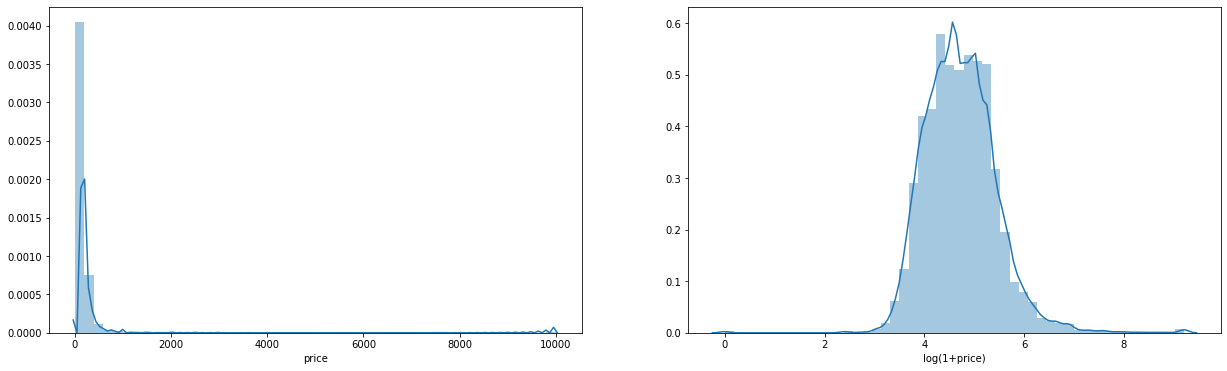

In [0]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['trimmed']['price'], ax=axes[0])
sns.distplot(np.log1p(df['trimmed']['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')

## USe the Log_Price to Subtitute the Price

In [21]:
df['trimmed']['log_price']=np.log1p(df['trimmed']['price'])
df['trimmed']['log_price']

0        4.615121
1        5.420535
2        4.499810
3        5.303305
4        4.110874
           ...   
50241    3.401197
50242    3.583519
50243    3.401197
50244    3.583519
50245    3.401197
Name: log_price, Length: 50246, dtype: float64

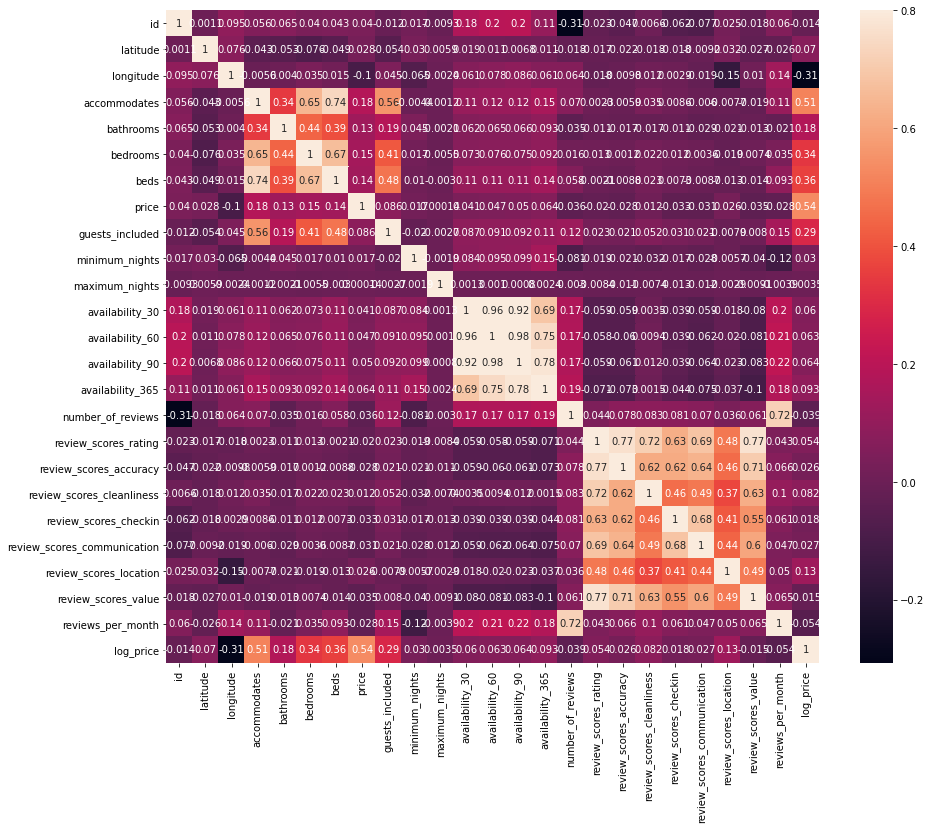

In [0]:
corrmatrix = df['trimmed'].corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True,annot=True)

<Figure size 2160x2160 with 0 Axes>

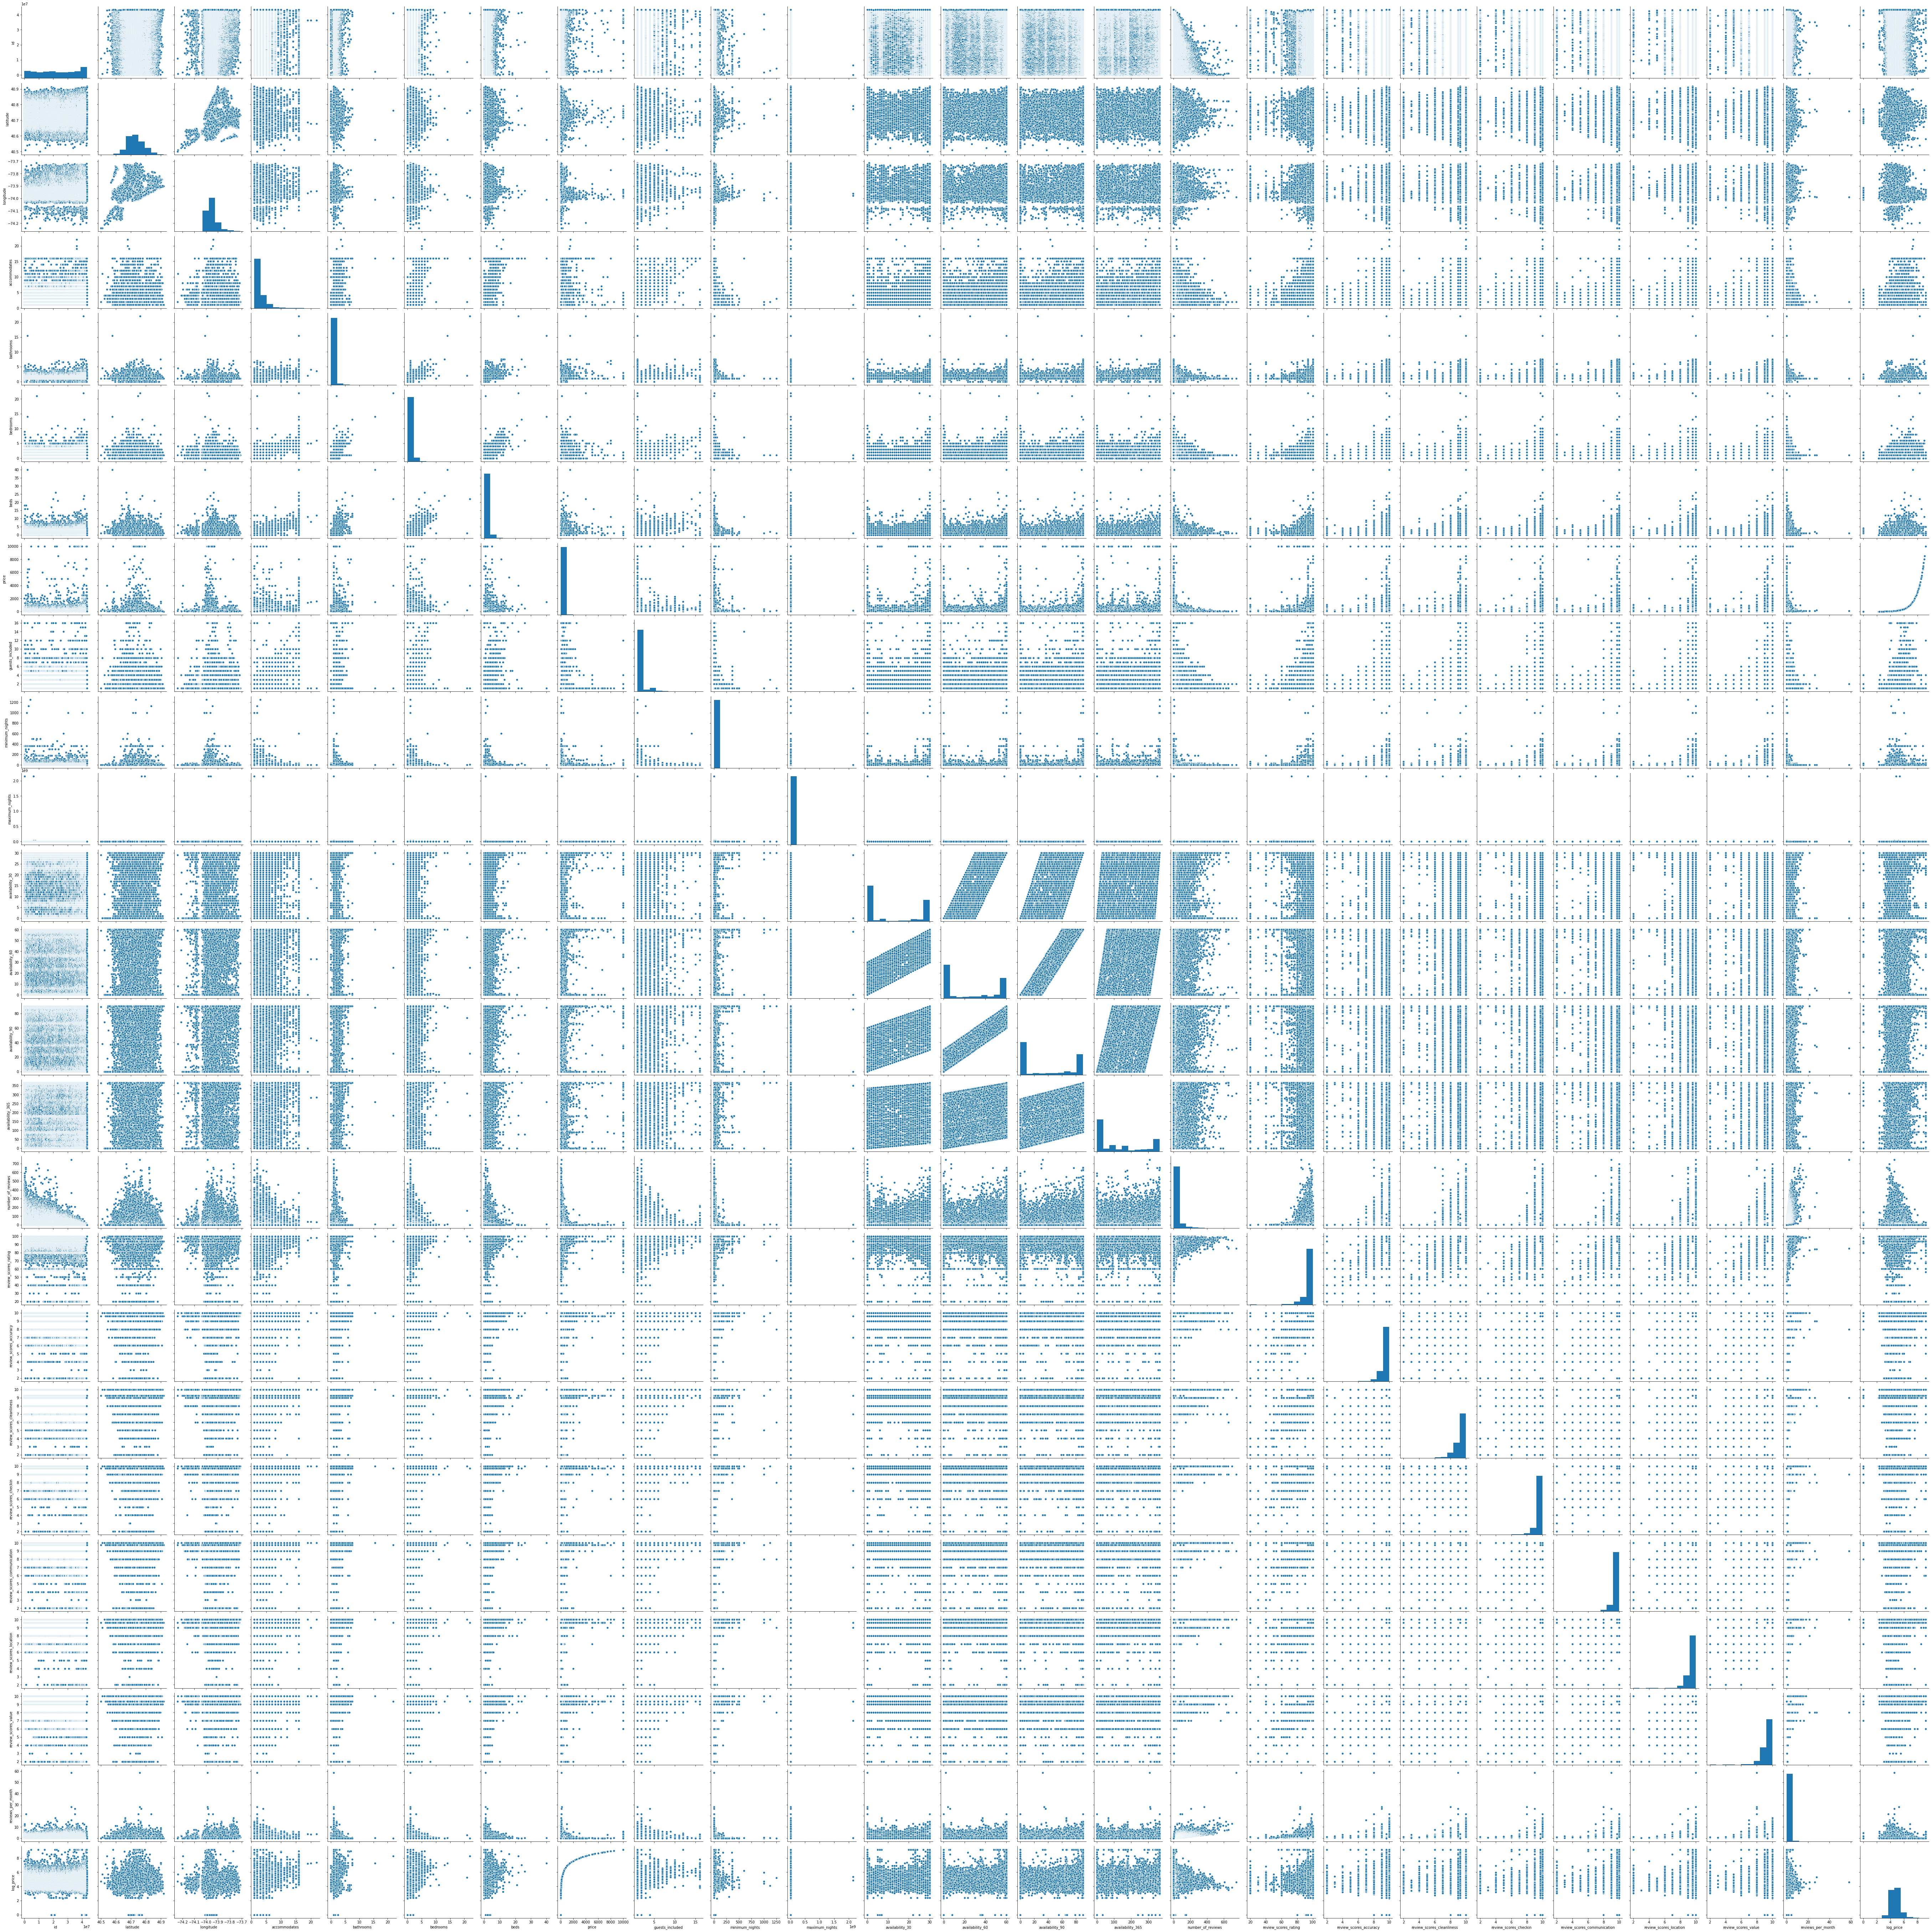

In [0]:
num_feature=df['trimmed']._get_numeric_data().columns
plt.figure(figsize=(30,30))
sns.pairplot(df['trimmed'][num_feature],height=3,diag_kind='hist')

In [0]:
num_feature=df['trimmed']._get_numeric_data().columns
cat_feature = [col for col in df['trimmed'].columns if col not in num_feature]
cat_feature

['neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'cancellation_policy']

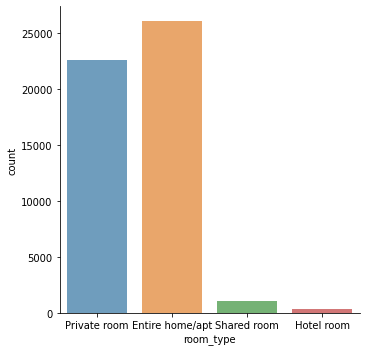

In [0]:
sns.catplot(x='room_type',  kind='count', data=df['trimmed'],alpha=0.7)

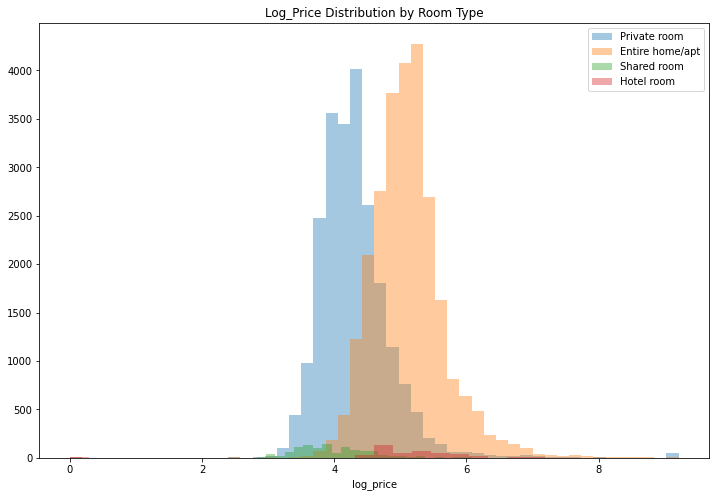

In [0]:
plt.figure(figsize=(12,8))
sns.distplot(df['trimmed'][df['trimmed']['room_type']=='Private room'].log_price, kde=False,label='Private room')
sns.distplot(df['trimmed'][df['trimmed']['room_type']=='Entire home/apt'].log_price, kde=False,label='Entire home/apt')
sns.distplot(df['trimmed'][df['trimmed']['room_type']=='Shared room'].log_price, kde=False,label='Shared room')
sns.distplot(df['trimmed'][df['trimmed']['room_type']=='Hotel room'].log_price, kde=False,label='Hotel room')
plt.title('Log_Price Distribution by Room Type')
plt.xlabel('log_price')
plt.legend()
plt.grid(False)

<Figure size 864x576 with 0 Axes>

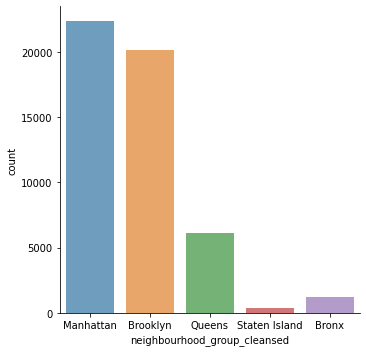

In [0]:
plt.figure(figsize=(12,8))
sns.catplot(x='neighbourhood_group_cleansed', kind='count', data=df['trimmed'],alpha=0.7)

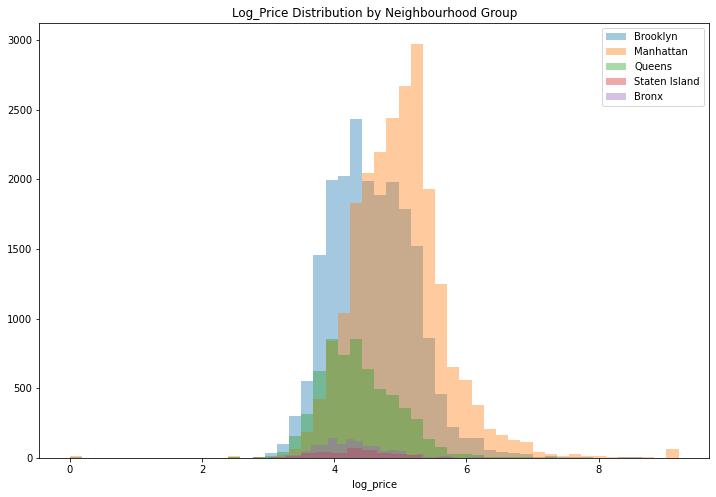

In [0]:
plt.figure(figsize=(12,8))
sns.distplot(df['trimmed'][df['trimmed']['neighbourhood_group_cleansed']=='Brooklyn'].log_price, kde=False,label='Brooklyn')
sns.distplot(df['trimmed'][df['trimmed']['neighbourhood_group_cleansed']=='Manhattan'].log_price, kde=False,label='Manhattan')
sns.distplot(df['trimmed'][df['trimmed']['neighbourhood_group_cleansed']=='Queens'].log_price, kde=False,label='Queens')
sns.distplot(df['trimmed'][df['trimmed']['neighbourhood_group_cleansed']=='Staten Island'].log_price, kde=False,label='Staten Island')
sns.distplot(df['trimmed'][df['trimmed']['neighbourhood_group_cleansed']=='Bronx'].log_price, kde=False,label='Bronx')
plt.title('Log_Price Distribution by Neighbourhood Group')
plt.xlabel('log_price')
plt.legend()
plt.grid(False)

In [0]:

df['trimmed'].neighbourhood_cleansed.value_counts()

Williamsburg                  3807
Bedford-Stuyvesant            3792
Harlem                        2724
Bushwick                      2495
Hell's Kitchen                2153
                              ... 
Rossville                        1
Bay Terrace, Staten Island       1
Huguenot                         1
Country Club                     1
Gerritsen Beach                  1
Name: neighbourhood_cleansed, Length: 223, dtype: int64

Text(0.5, 1.0, 'Number of Property Type')

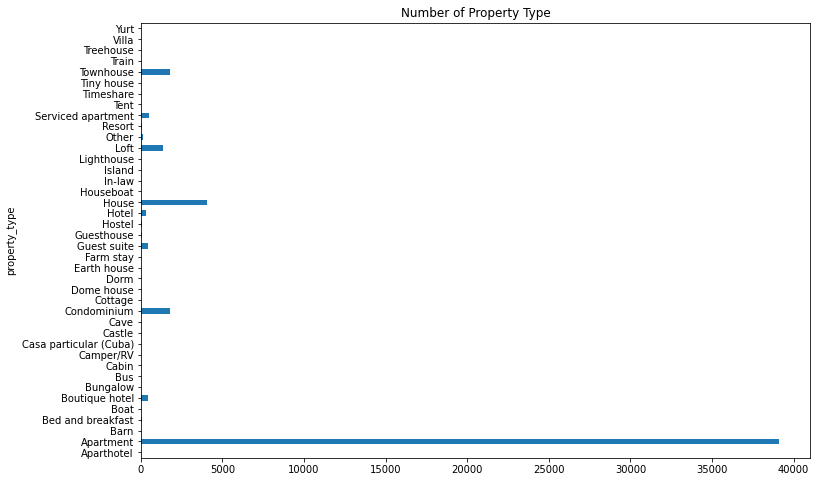

In [0]:
plt.figure(figsize=(12,8))
pro=df['trimmed'].groupby('property_type').id.count()
pro.plot.barh()
plt.title("Number of Property Type")

Text(0.5, 1.0, 'Number of Property Type over $2000/night')

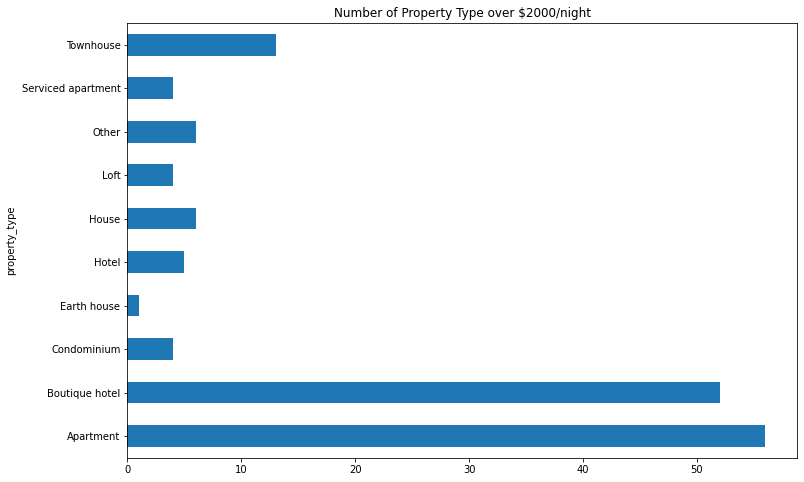

In [0]:
plt.figure(figsize=(12,8))
pro_highprice=df['trimmed'][df['trimmed']['price']>2000].groupby('property_type').id.count()
pro_highprice.plot.barh()
plt.title("Number of Property Type over $2000/night")

In [0]:
df['trimmed'].cancellation_policy.value_counts()

strict_14_with_grace_period    22373
flexible                       16095
moderate                       11669
super_strict_60                   91
super_strict_30                   16
strict                             2
Name: cancellation_policy, dtype: int64

In [0]:
df['trimmed'].bed_type.value_counts()

Real Bed         49543
Futon              265
Pull-out Sofa      225
Airbed             149
Couch               64
Name: bed_type, dtype: int64

# 2. Data Preprocessing

## Unzip the Amenities Column

In [0]:
#to get the unrepeated amenities types
amenities_set = set()
for n in range(len(df['trimmed'])):
  temp_amenities = df['trimmed']['amenities'][n].split(',')
  for m in range(len(temp_amenities)):
    if re.sub("[{}\"]","",temp_amenities[m]).strip() not in amenities_set:
      amenities_set.add(re.sub("[{}\"]","",temp_amenities[m]).strip())


In [23]:
#unzip each row
df['amenities']=df['trimmed'][['id','log_price','amenities']]
amenities_list = list(amenities_set)
for n in amenities_list:
  df['amenities'][n] = 0
  for m in range(len(df['amenities'])):
    if n in df['trimmed']['amenities'][m]:
      df['amenities'][n][m] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_n

In [24]:
# find the correlation between log_price and each type of amenities
df_price_corr=df['amenities'].corr()['log_price']
price_corr_list = ['id']
for i in df_price_corr.index:
  if abs(df_price_corr[i])>0.1:   # only keep the corr > 0.1
    print(i,df_price_corr[i])
    price_corr_list.append(i)
df['amenities_filtered'] = df['amenities'][price_corr_list]
df['amenities_filtered'].head()

log_price 1.0
Paid parking off premises 0.10122791949871808
Iron 0.11107985389459528
Dryer 0.18325413620702402
Indoor fireplace 0.11350137323517853
Doorman 0.13472469149603644
Crib 0.12455355433591107
High chair 0.10275908993191595
Front desk -0.10593286438010151
Hair dryer 0.13149601478982287
Children’s books and toys 0.10052901994436188
Cable TV 0.20333477776334521
Washer 0.1805649742445784
TV 0.2619452838347856
Pack ’n Play/travel crib 0.1340300044728197
Family/kid friendly 0.17717748280424178
Lock on bedroom door -0.1876099956038007
Shampoo 0.11587834590427842
Building staff 0.12334465288034827
Air conditioning 0.2041364740672369
Private entrance 0.1472220458913573
translation missing: en.hosting_amenity_49 -0.11516218653337248
Elevator 0.19371811224937854
Gym 0.19153494496206072
Dishwasher 0.18098728135175304
Bathtub 0.12358691689776173
Pets allowed 0.10992090959428745


id  log_price  ...  Bathtub  Pets allowed
0  2060   4.615121  ...        0             0
1  2595   5.420535  ...        1             0
2  3831   4.499810  ...        1             1
3  5099   5.303305  ...        1             0
4  5121   4.110874  ...        0             0

[5 rows x 28 columns]

In [25]:
# merge back to the main datframe
df['amenities_addback']=df['trimmed'].merge(df['amenities_filtered'],how='left',left_on='id',right_on='id')
df['amenities_addback'].head()


id neighbourhood_cleansed  ... Bathtub  Pets allowed
0  2060     Washington Heights  ...       0             0
1  2595                Midtown  ...       1             0
2  3831           Clinton Hill  ...       1             1
3  5099            Murray Hill  ...       1             0
4  5121     Bedford-Stuyvesant  ...       0             0

[5 rows x 59 columns]

In [26]:
df['processed']=df['amenities_addback'].drop(columns=['neighbourhood_cleansed','amenities','log_price_y'])
df['processed'] = df['processed'].rename(columns={'log_price_x': 'log_price'})
df['processed'].shape

(50246, 56)

## Categorical Data to Numberic



In [0]:
neighbourhood_dict = {'Bronx':1,'Queens':2,'Staten Island':3,'Brooklyn':4,'Manhattan':5}
property_type_list = ['Townhouse','Serviced apartment','Other','Loft','House','Hotel','Earth house','Condominium','Boutique hotel']
room_type_dict = {'Shared room':1,'Private room':2,'Entire home/apt':3, 'Hotel room':4}
bed_type_dict = {'Couch':1,'Airbed':2,'Pull-out Sofa':3,'Futon':4,'Real Bed':5}
cancellation_policy_dict={'flexible':1,'moderate':2,'strict_14_with_grace_period':3,'strict':4,'super_strict_30':5,'super_strict_60':6}

In [0]:
df['processed']['neighbourhood_group_cleansed'] = df['processed']['neighbourhood_group_cleansed'].apply(lambda x: neighbourhood_dict[x])
df['processed']['property_type'] = df['processed']['property_type'].apply(lambda x: 1 if x in property_type_list else 0)
df['processed']['room_type'] = df['processed']['room_type'].apply(lambda x: room_type_dict[x])
df['processed']['bed_type'] = df['processed']['bed_type'].apply(lambda x: bed_type_dict[x])
df['processed']['cancellation_policy'] = df['processed']['cancellation_policy'].apply(lambda x: cancellation_policy_dict[x])


In [0]:
df['processed'].head()

id  neighbourhood_group_cleansed  latitude  ...  Dryer  Shampoo  Gym
0  2060                             5  40.85722  ...      0        0    0
1  2595                             5  40.75362  ...      0        0    0
2  3831                             4  40.68514  ...      0        1    0
3  5099                             5  40.74767  ...      0        1    0
4  5121                             4  40.68688  ...      0        0    0

[5 rows x 56 columns]

In [29]:
X=df['processed'][[col for col in df['processed'].columns if col not in ['id', 'price','log_price']]]
y=df['processed']['log_price']
X.shape

(50246, 53)

## Feature Scaling : Robust Scaler

In [30]:

from sklearn.preprocessing import scale,RobustScaler
columns=X.columns.tolist()
scaler=RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=columns)
X.head()

neighbourhood_group_cleansed  latitude  ...  Bathtub  Pets allowed
0                           1.0  1.827597  ...      0.0           0.0
1                           1.0  0.408370  ...      1.0           0.0
2                           0.0 -0.529744  ...      1.0           1.0
3                           1.0  0.326861  ...      1.0           0.0
4                           0.0 -0.505908  ...      0.0           0.0

[5 rows x 53 columns]

## Splitting the Dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f'The shape of Xtrain:{X_train.shape}')
print(f'The shape of Xtest:{X_test.shape}')
print(f'The shape of ytrain:{y_train.shape}')
print(f'The shape of ytest:{y_test.shape}')


The shape of Xtrain:(40196, 53)
The shape of Xtest:(10050, 53)
The shape of ytrain:(40196,)
The shape of ytest:(10050,)


# 3. Predictive Modeling

## Xgboost Modeling

In [0]:
xgb_params = {
    'max_depth': 12,
    'learning_rate': 0.05,
    'n_estimators': 3000,
    'subsample': .75,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': True,
    'nthread': -1,
    'gamma': 1,
    'min_child_weight': 1,
    'max_delta_step': 0,
    'subsample': 0.85,
    'colsample_bytree': 0.7,
    'colsample_bylevel': 1,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'missing': None,
    'seed': 1
}

In [80]:
#import xgboost as xgb
regressor=xgb.XGBRegressor(**xgb_params)
regressor.fit(X_train,y_train.values, eval_metric='rmse',verbose=1, eval_set=[(X_test, y_test)],early_stopping_rounds=150)
y_pred=regressor.predict(X_test)
print('RMSE of log_price[x_test]) : %s" ' % str(mean_squared_error(y_test,y_pred) ** 0.5))

[0]	validation_0-rmse:4.08991
Will train until validation_0-rmse hasn't improved in 150 rounds.
[1]	validation_0-rmse:3.88887
[2]	validation_0-rmse:3.69826
[3]	validation_0-rmse:3.51733
[4]	validation_0-rmse:3.34533
[5]	validation_0-rmse:3.18207
[6]	validation_0-rmse:3.02732
[7]	validation_0-rmse:2.88054
[8]	validation_0-rmse:2.74098
[9]	validation_0-rmse:2.60862
[10]	validation_0-rmse:2.48308
[11]	validation_0-rmse:2.36376
[12]	validation_0-rmse:2.25086
[13]	validation_0-rmse:2.14385
[14]	validation_0-rmse:2.04219
[15]	validation_0-rmse:1.9456
[16]	validation_0-rmse:1.85424
[17]	validation_0-rmse:1.76816
[18]	validation_0-rmse:1.686
[19]	validation_0-rmse:1.60858
[20]	validation_0-rmse:1.53519
[21]	validation_0-rmse:1.4653
[22]	validation_0-rmse:1.39952
[23]	validation_0-rmse:1.33702
[24]	validation_0-rmse:1.27781
[25]	validation_0-rmse:1.22192
[26]	validation_0-rmse:1.16917
[27]	validation_0-rmse:1.11921
[28]	validation_0-rmse:1.07176
[29]	validation_0-rmse:1.02737
[30]	validation_0-

In [81]:
print(f'train mse is {mean_squared_error(regressor.predict(X_train),y_train)}')
print(f'test mse is {mean_squared_error(regressor.predict(X_test),y_test)}')

train mse is 0.07166752276563329
test mse is 0.15245229986864925


## XGBoost Model Prediction


**Test RMSE = 0.3904**

**Train Set MSE = 0.0717**

**Test Set MSE = 0.1524**

## Random Forest Regression Model

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [0]:
def r2_score(model):
    return cross_val_score(model,X_train,y_train,cv=8)
def rmse_score(model):
    return cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=8)

Random Forest Prediction 

In [69]:
base_rfr_cv = r2_score(RandomForestRegressor(random_state=42))
base_rfr_model=RandomForestRegressor(random_state=42)
base_rfr_model = base_rfr_model.fit(X_train,y_train)
rfr_predict_ytrain = base_rfr_model.predict(X_train)
rfr_predict_ytest = base_rfr_model.predict(X_test)
base_rfr_result=pd.DataFrame({'model':['RandomForestRegressor'],
                'CV_rfr_r2:':base_rfr_cv.mean(),
                'train error:':mean_squared_error(rfr_predict_ytrain,y_train),
                'test error:':mean_squared_error(rfr_predict_ytest,y_test)})
base_rfr_result

model  CV_rfr_r2:  train error:  test error:
0  RandomForestRegressor    0.675275      0.023069       0.1639

In [76]:
print('RMSE of log_price[x_test]) : %s" ' % str(mean_squared_error(y_test,y_pred) ** 0.5))

RMSE of log_price[x_test]) : 0.44916341077221356" 


## Grid Search

In [70]:
from sklearn.model_selection import GridSearchCV
n_estimators=[10]
max_depth=[i for i in range(5,10,2)]
max_features=[i for i in range(5,14,1)]
min_samples_leaf=[i for i in range(2,10,1)]
min_samples_split=[i for i in range(2,5,1)]
parameters = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'max_features':max_features,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split':min_samples_split
}
rfr = RandomForestRegressor(random_state=42)
GS=GridSearchCV(rfr,parameters,cv=3)
GS.fit(X_train,y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [71]:
GS.best_params_ #best parameters for train set

{'max_depth': 9,
 'max_features': 13,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 10}


## Important Features to Affect the Housing Price

In [75]:
importance = RFregressor.feature_importances_
columns = X_train.columns
d = pd.Series(data=importance,index=columns)
d.sort_values(ascending=False)


room_type                                     0.347682
accommodates                                  0.172151
longitude                                     0.126082
latitude                                      0.070454
bathrooms                                     0.049360
neighbourhood_group_cleansed                  0.040412
guests_included                               0.033743
bedrooms                                      0.028548
property_type                                 0.012818
minimum_nights                                0.012456
Elevator                                      0.010281
beds                                          0.008834
TV                                            0.008417
Gym                                           0.008241
Private entrance                              0.005676
reviews_per_month                             0.004889
availability_90                               0.004726
Washer                                        0.004550
Dryer     

# Second Section - Implementing Foursquare Data

#4. Continue Exploration with Foursquare Data

### Get New York Data

In [0]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [0]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [0]:
neighborhoods_data = newyork_data['features']

In [0]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [0]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

### Using Foursquare to Get top50 Venues in Each Neighborhood

In [0]:
CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET = # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
#rhythmii abbychiahui qq done

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [0]:
def exploreNearbyVenues(names, latitudes, longitudes, radius=2000, limit=50):
    venues_list=[]
    num = 1
    for name, lat, lng in zip(names, latitudes, longitudes):
# 4deefb944765f83613cdba6e, Historic Site
# 4bf58dd8d48988d12d941735, Monument / Landmark
# 4bf58dd8d48988d164941735, Plaza
# 4bf58dd8d48988d181941735, Museum
# 4bf58dd8d48988d184941735, Stadium
# 4bf58dd8d48988d1ae941735, University
# 4bf58dd8d48988d1f9941735, Food & Drink Shop
# 4d4b7105d754a06379d81259, Travel & Transport
# 4bf58dd8d48988d1fa931735 Hotel


        # create the API request URL
        print ("Running Foursquare for No. %d district - %s" % (num, name))
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId=4deefb944765f83613cdba6e,4bf58dd8d48988d12d941735,4bf58dd8d48988d164941735,4bf58dd8d48988d181941735,4bf58dd8d48988d1f9941735,4d4b7105d754a06379d81259&intent=browse&&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                    CLIENT_ID, 
                    CLIENT_SECRET, 
                    VERSION, 
                    lat, 
                    lng, 
                    radius, 
                    limit)
        results = requests.get(url).json()["response"]
        if results['groups'][0]['items'] != []:
          venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results['groups'][0]['items']])
        else:
          temp_list = [(name, lat, lng, 'No result', 0.0, 0.0,  'No result')]
          venues_list.append(temp_list)
        num += 1

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
nearby_venues.to_csv('newyork_all.csv')

### Implement New York Data to Airbnb Data

In [0]:
nyc = {}
nyc['raw']=pd.read_csv('/content/sample_data/newyork_all.csv')
nyc['raw'].head()

Unnamed: 0  Unnamed: 0.1  ... Venue Longitude       Venue Category
0           0             0  ...      -73.865364  Rental Car Location
1           1             1  ...      -73.862814        Train Station
2           2             2  ...      -73.854805  Rental Car Location
3           3             3  ...      -73.854182          Bus Station
4           4             4  ...      -73.854533          Bus Station

[5 rows x 9 columns]

In [0]:
nyc['processed'] = nyc['raw'][['Venue','Venue Latitude','Venue Longitude','Venue Category']]
nyc['processed'].head()

Venue  ...       Venue Category
0                              Enterprise Rent-A-Car  ...  Rental Car Location
1               Metro North - Woodlawn Train Station  ...        Train Station
2                                 Quality Rent A Car  ...  Rental Car Location
3                                      Bx16 Bus Stop  ...          Bus Station
4  Bee Line 42 MTA NYCT BX39 MTABus BXM11 (White ...  ...          Bus Station

[5 rows x 4 columns]

In [0]:
print(nyc['processed']['Venue Category'].unique())
print(nyc['processed'].shape)
print(nyc['processed'].isnull().sum())

['Rental Car Location' 'Train Station' 'Bus Station' 'Metro Station'
 'Intersection' 'Bus Stop' 'Hotel' 'Border Crossing' 'Platform'
 'Baggage Locker' 'Boat or Ferry' 'Moving Target' 'Toll Plaza'
 'Tram Station' 'Tourist Information Center' 'Rest Area' 'Tunnel'
 'Travel & Transport' 'Pier' 'Motel' 'Bike Rental / Bike Share' 'Resort'
 'Airport Service' 'Heliport' 'Hotel Pool' 'Hostel' 'Bed & Breakfast'
 'Toll Booth' 'Light Rail Station' 'Airport Terminal' 'Port' 'Boat Rental'
 'Cruise' 'Duty-free Shop' 'Taxi Stand' 'Airport Lounge'
 'Airport Food Court']
(12591, 4)
Venue              0
Venue Latitude     0
Venue Longitude    0
Venue Category     0
dtype: int64


### Build Category Type for Venue Category

In [0]:
valid_category_list =['Rental Car Location', 'Train Station', 'Bus Station',
       'Metro Station', 'Bus Stop', 'Hotel','Boat or Ferry',
       'Tourist Information Center','Travel & Transport', 'Pier', 'Motel', 
       'Bike Rental / Bike Share','Resort', 'Heliport', 
       'Hostel','Bed & Breakfast', 'Light Rail Station','Airport Terminal', 
       'Port', 'Cruise', 'Taxi Stand']
valid_category_dict = {'Nearby_hotel':['Motel','Hotel','Hostel','Bed & Breakfast','Resort'],
                       'Nearby_air_train':['Train Station','Travel & Transport','Heliport','Metro Station','Airport Terminal','Light Rail Station'],
                       'Nearby_bus_taxi_ship':['Rental Car Location','Bus Station','Bus Stop','Boat or Ferry','Pier','Bike Rental / Bike Share','Port', 'Cruise', 'Taxi Stand'],
                       'Nearby_tour':['Tourist Information Center']}
nyc['filtered'] = nyc['processed'][nyc['processed']['Venue Category'].isin(valid_category_list)]
nyc['filtered']['Venue Category Type'] = ''
# transform original venue to category to category type
for i in range(len(nyc['filtered'])):
  for dict_key, dict_list in valid_category_dict.items():
    if nyc['filtered'].iat[i,3] in dict_list:
      nyc['filtered'].iat[i,4] = dict_key
nyc['filtered'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Venue  ...   Venue Category Type
0                              Enterprise Rent-A-Car  ...  Nearby_bus_taxi_ship
1               Metro North - Woodlawn Train Station  ...      Nearby_air_train
2                                 Quality Rent A Car  ...  Nearby_bus_taxi_ship
3                                      Bx16 Bus Stop  ...  Nearby_bus_taxi_ship
4  Bee Line 42 MTA NYCT BX39 MTABus BXM11 (White ...  ...  Nearby_bus_taxi_ship

[5 rows x 5 columns]

### Define the Function to Calculate the Distance

In [0]:

from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 #
    return c * r * 1000

### Number of Nearby Venues for Each Airbnb Place

In [0]:
df['processed_ver2'] = df['processed']
for dict_key, dict_list in valid_category_dict.items():
  df['processed_ver2'][dict_key] = 0

for index_i, row_i in df['processed_ver2'].iterrows():
  df['tmp'] = nyc['filtered'][(abs(nyc['filtered']['Venue Longitude']-row_i['longitude'])<0.03)|(abs(nyc['filtered']['Venue Longitude']-row_i['longitude'])<0.03)]
  nearby_dict = {'Nearby_hotel':0,'Nearby_air_train':0, 'Nearby_bus_taxi_ship':0,'Nearby_tour':0}
  for index_j, row_j in df['tmp'].iterrows():
    if haversine(row_i['longitude'], row_i['latitude'], row_j['Venue Longitude'], row_j['Venue Latitude']) <= 500:
      nearby_dict[row_j['Venue Category Type']] += 1
  for key in nearby_dict:
    df['processed_ver2'].at[index_i,key] = nearby_dict[key]
  print(index_i)


In [0]:
df['processed_ver2'].to_csv('finally_finished.csv')

## Price Prediction with Adding Foursquare Data

In [0]:
Airbnb_with_Foursqure=pd.read_csv('finally_finished.csv')

In [5]:
Airbnb_with_Foursqure.head()

id  neighbourhood_group_cleansed  ...  Nearby_bus_taxi_ship  Nearby_tour
0  2060                             5  ...                     2            0
1  2595                             5  ...                     0            0
2  3831                             4  ...                     0            0
3  5099                             5  ...                     2            0
4  5121                             4  ...                     0            0

[5 rows x 60 columns]

In [0]:
X_with_Foursqure=Airbnb_with_Foursqure[[col for col in Airbnb_with_Foursqure.columns if col not in ['id', 'price','log_price']]]
y_with_Foursqure=Airbnb_with_Foursqure['log_price']

In [9]:
columns=X_with_Foursqure.columns.tolist()
scaler=RobustScaler()
X_with_Foursqure = pd.DataFrame(scaler.fit_transform(X_with_Foursqure),columns=columns)
X_with_Foursqure.head()

neighbourhood_group_cleansed  latitude  ...  Nearby_bus_taxi_ship  Nearby_tour
0                           1.0  1.827597  ...              0.666667          0.0
1                           1.0  0.408370  ...              0.000000          0.0
2                           0.0 -0.529744  ...              0.000000          0.0
3                           1.0  0.326861  ...              0.666667          0.0
4                           0.0 -0.505908  ...              0.000000          0.0

[5 rows x 57 columns]

In [10]:
X_with_Foursqure_train, X_with_Foursqure_test, y_with_Foursqure_train, y_with_Foursqure_test = train_test_split(X_with_Foursqure, y_with_Foursqure, test_size = 0.2, random_state = 42)
print(f'The shape of Xtrain:{X_with_Foursqure_train.shape}')
print(f'The shape of Xtest:{X_with_Foursqure_test.shape}')
print(f'The shape of ytrain:{y_with_Foursqure_train.shape}')
print(f'The shape of ytest:{y_with_Foursqure_test.shape}')

The shape of Xtrain:(40196, 57)
The shape of Xtest:(10050, 57)
The shape of ytrain:(40196,)
The shape of ytest:(10050,)


In [12]:
regressor=xgb.XGBRegressor(**xgb_params)
regressor.fit(X_with_Foursqure_train,y_with_Foursqure_train.values, eval_metric='rmse',verbose=1, eval_set=[(X_with_Foursqure_test, y_with_Foursqure_test)],early_stopping_rounds=150)
y_with_Foursquare_pred=regressor.predict(X_with_Foursqure_test)
print('RMSE of log_price[X_with_Foursqure_test]) : %s" ' % str(mean_squared_error(y_with_Foursqure_test,y_with_Foursquare_pred) ** 0.5))

[0]	validation_0-rmse:4.08999
Will train until validation_0-rmse hasn't improved in 150 rounds.
[1]	validation_0-rmse:3.88957
[2]	validation_0-rmse:3.69888
[3]	validation_0-rmse:3.51787
[4]	validation_0-rmse:3.34595
[5]	validation_0-rmse:3.18265
[6]	validation_0-rmse:3.02813
[7]	validation_0-rmse:2.8812
[8]	validation_0-rmse:2.74185
[9]	validation_0-rmse:2.6093
[10]	validation_0-rmse:2.48373
[11]	validation_0-rmse:2.36436
[12]	validation_0-rmse:2.25195
[13]	validation_0-rmse:2.14508
[14]	validation_0-rmse:2.04334
[15]	validation_0-rmse:1.94669
[16]	validation_0-rmse:1.8553
[17]	validation_0-rmse:1.76866
[18]	validation_0-rmse:1.68648
[19]	validation_0-rmse:1.60916
[20]	validation_0-rmse:1.5357
[21]	validation_0-rmse:1.46577
[22]	validation_0-rmse:1.39964
[23]	validation_0-rmse:1.33711
[24]	validation_0-rmse:1.27795
[25]	validation_0-rmse:1.22211
[26]	validation_0-rmse:1.16922
[27]	validation_0-rmse:1.1193
[28]	validation_0-rmse:1.07193
[29]	validation_0-rmse:1.02757
[30]	validation_0-r

In [13]:
print(f'train mse is {mean_squared_error(regressor.predict(X_with_Foursqure_train),y_with_Foursqure_train)}')
print(f'test mse is {mean_squared_error(regressor.predict(X_with_Foursqure_test),y_with_Foursqure_test)}')

train mse is 0.06850806919289931
test mse is 0.15246101876856497


## XGBoost Prediction after Adding Foursquare Data
**Test RMSE is 0.3904**

**Train mse is 0.0685**

**Test mse is 0.1524**